<b>Model Architechure:</b><br>
    Convolution((5,5),32) -> MaxPool((2,2),padding=same) -> Convolution((5,5),64) -> MaxPool((2,2),padding=same) -> DenseLayer , Dropout(0.5) -> output

In [21]:
import tensorflow as tf
import numpy
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation,MaxPool2D,Conv2D,Dropout
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
import pandas as pd

data_train = pd.read_csv('./mnistd/train.csv')
data_test = pd.read_csv('./mnistd/test.csv')

print(data_train.shape)
print(data_test.shape)

(42000, 785)
(28000, 784)


In [15]:
y_train = data_train['label'] 
data_train = data_train.drop('label',axis=1)
x_train = data_train.values
x_test = data_test.values

In [17]:
x_train = x_train.reshape([-1,28,28,1])
x_test = x_test.reshape([-1,28,28,1])
print(x_train.shape,x_test.shape)

(42000, 28, 28, 1) (28000, 28, 28, 1)


In [18]:
x_train = x_train/255 #normalising the image
x_test = x_test/255

y_train = keras.utils.np_utils.to_categorical(y_train)

the label is: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


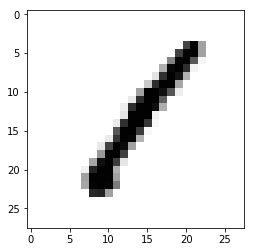

In [33]:
def show(image_num):
    plt.imshow(1-x_train[image_num-1][:, :, 0], cmap='gray')
    print("the label is:",y_train[image_num-1])

image_num = 1
show(image_num)

In [26]:
model = Sequential()
model.add(Conv2D(32, (5, 5), padding="same", input_shape=[28, 28, 1])) #Convolution Layer
model.add(MaxPool2D((2,2))) # Pooling Layer
model.add(Conv2D(64, (5, 5), padding="same"))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5)) #Adding Dropout
model.add(Dense(10,activation='softmax'))




In [27]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, validation_split=0.06, batch_size=100, epochs=4, verbose=2)

Train on 39480 samples, validate on 2520 samples
Epoch 1/4
 - 179s - loss: 0.1855 - acc: 0.9439 - val_loss: 0.0735 - val_acc: 0.9782
Epoch 2/4
 - 185s - loss: 0.0653 - acc: 0.9790 - val_loss: 0.0457 - val_acc: 0.9853
Epoch 3/4
 - 187s - loss: 0.0444 - acc: 0.9856 - val_loss: 0.0351 - val_acc: 0.9857
Epoch 4/4
 - 184s - loss: 0.0376 - acc: 0.9879 - val_loss: 0.0284 - val_acc: 0.9897


In [47]:
y_test = model.predict_classes(x_test)
print(type(y_test))

<class 'numpy.ndarray'>


In [48]:
img_id = numpy.array([[i] for i in range(1,28001)])
y_test = y_test.reshape((28000,1))
y_test = numpy.concatenate((img_id,y_test),axis=1)
y_test.shape

(28000, 2)

#### Got an accuracy of of 0.982 on test set<br>